# PACKAGE 

In [113]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from  sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score

In [114]:
data = pd.read_csv("Salary_Data.csv")

In [115]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [116]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [117]:
data.shape

(30, 2)

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [119]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

<Axes: >

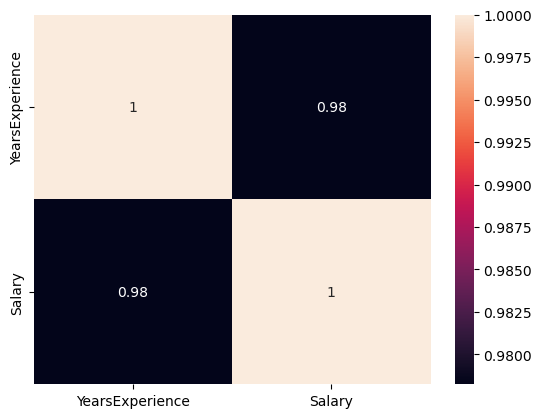

In [120]:
sns.heatmap(data.corr(), annot=True)

In [121]:
data.corr().Salary.sort_values(ascending = False)

Salary             1.000000
YearsExperience    0.978242
Name: Salary, dtype: float64

In [122]:
data[data['YearsExperience'] > 5]

,YearsExperience,Salary
16,5.1,66029.0
17,5.3,83088.0
18,5.9,81363.0
19,6.0,93940.0
20,6.8,91738.0
21,7.1,98273.0
22,7.9,101302.0
23,8.2,113812.0
24,8.7,109431.0
25,9.0,105582.0


In [123]:
data['YearsExperience'].min() 

1.1

In [124]:
data['YearsExperience'].max()

10.5

# Division des données en variables indépendantes et dépendantes 

In [126]:
X = data.iloc[:30 , :-1]
y = data.iloc[:30 , -1]

# Separation de donnees

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

In [129]:
# Affichage des dimensions
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

X_train: (24, 1)
y_train: (24,)


In [130]:
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_test: (6, 1)
y_test: (6,)


# Création du modèle
# Linear Régression: Régression linéaire

In [132]:
modele_Lineaire = LinearRegression()

In [133]:
modele_Lineaire.fit(X_train, y_train)

LinearRegression()

In [134]:
X_test

,YearsExperience
15,4.9
28,10.3
26,9.5
10,3.9
24,8.7
0,1.1


In [135]:
Salary_lr = modele_Lineaire.predict(X_test)
Salary_lr

array([ 72023.51967848, 123221.12252239, 115636.29247144,  62542.48211479,
       108051.46242049,  35995.57693647])

In [136]:
r2_score(y_test, Salary_lr)

0.9944092048209745

In [137]:
print("Mean Squared Error:", mean_absolute_error(y_test, Salary_lr))
print("R2 Squared :", r2_score(y_test, Salary_lr))

Mean Squared Error: 1941.8047096136772
R2 Squared : 0.9944092048209745


In [138]:
modele_Lineaire.score(X_test, y_test)

0.9944092048209745

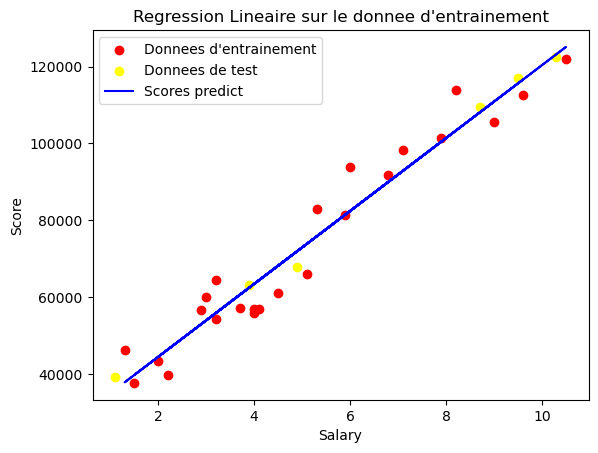

In [139]:
plt.scatter(X_train, y_train, color='red', label="Donnees d'entrainement") 
plt.scatter(X_test, y_test, color='yellow', label="Donnees de test") 
plt.plot(X_train, modele_Lineaire.predict(X_train),color='blue', label="Scores predict")
plt.xlabel("Salary")
plt.ylabel("Score")
plt.title("Regression Lineaire sur le donnee d'entrainement")
plt.legend()
plt.show()

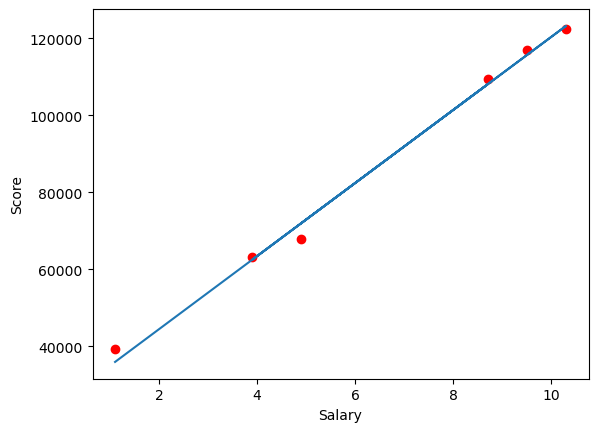

In [167]:
plt.scatter(X_test, y_test, color='red') 
plt.plot(X_test, Salary_lr)
plt.xlabel("Salary")
plt.ylabel("Score")
plt.show()